# Understanding Descriptive Statistics

Import the necessary libraries here:

In [86]:
import pandas as pd
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [87]:
import random

dice_roll = np.random.randint(1,6,size = 10)
dice_roll_df = pd.DataFrame({"Rolls":dice_roll})
display(dice_roll_df)

,Rolls
0,3
1,3
2,4
3,4
4,2
5,4
6,1
7,2
8,5
9,5


#### 2.- Plot the results sorted by value.

In [88]:
sorted_dice_rolls_df = dice_roll_df['Rolls'].value_counts().sort_index()
sorted_dice_rolls_df

1    1
2    2
3    2
4    3
5    2
Name: Rolls, dtype: int64

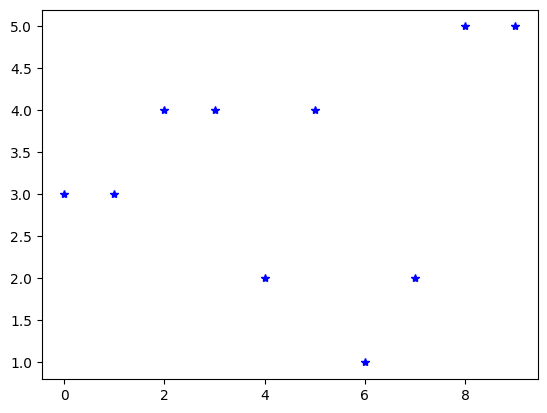

In [89]:
import matplotlib.pyplot as plt

plt.plot(dice_roll_df,'b*')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

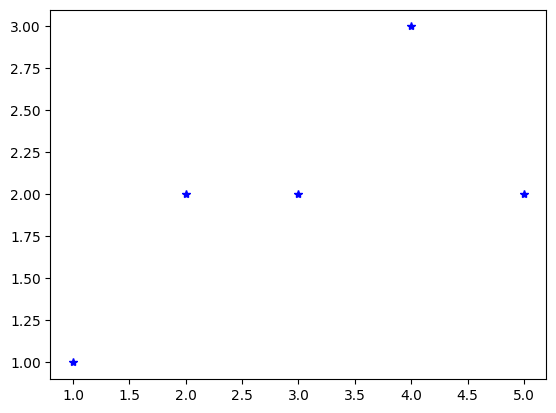

In [90]:
plt.plot(sorted_dice_rolls_df,'b*')
plt.show()

In [91]:
"""
The first plot gives the result of each roll. (Roll 1 was 1, Roll 2 was 3, etc...)
The second plot gives the frequency of each number after the 10 rolls. (The dice gave a result of 1 twice, it gave a result of 2 only once, etc... )
"""

'\nThe first plot gives the result of each roll. (Roll 1 was 1, Roll 2 was 3, etc...)\nThe second plot gives the frequency of each number after the 10 rolls. (The dice gave a result of 1 twice, it gave a result of 2 only once, etc... ) \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles.

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value.

In [92]:
def calculate_mean(df):
  mean = (np.sum(df))/len(df)
  return mean

result_mean = calculate_mean(dice_roll)
display(result_mean)


3.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value.

In [93]:
def calculate_fd(df):
  frequency_distribution = {}
  for value in df:
    if value in frequency_distribution:
        frequency_distribution[value] += 1
    else:
        frequency_distribution[value] = 1
  return frequency_distribution

result_fd = calculate_fd(dice_roll)
display(result_fd)


{3: 2, 4: 3, 2: 2, 1: 1, 5: 2}

In [94]:
def calculate_mean2(freq_dict):
    sum_of_products = sum(k * v for k, v in freq_dict.items())
    mean2 = sum_of_products / sum(freq_dict.values())
    return mean2

result_mean2 = calculate_mean2(result_fd)
display(result_mean2)



3.3

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value.
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [95]:
def calculate_median(data):
    data.sort()
    num_observations = len(data)

    if num_observations % 2 == 0:
        mid_idx = num_observations // 2
        median = (data[mid_idx - 1] + data[mid_idx]) / 2
    else:
        mid_idx = num_observations // 2
        median = data[mid_idx]
    return median

result_median = calculate_median(dice_roll)
display(result_median)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles.

In [96]:
def calculate_quartiles(data):
    data.sort()

    num_observations = len(data)
    q2 = calculate_median(data)

    lower_half = data[:num_observations // 2] if num_observations % 2 == 0 else data[:num_observations // 2]
    q1 = calculate_median(lower_half)

    upper_half = data[num_observations // 2 + 1:] if num_observations % 2 == 0 else data[num_observations // 2 + 1:]
    q3 = calculate_median(upper_half)

    return q1, q2, q3

result_quartiles = calculate_quartiles(dice_roll)
display(result_quartiles)

(2, 3.5, 4.5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [97]:
hundred_rolls = pd.read_csv("roll_the_dice_hundred.csv")
hundred_rolls

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [98]:
hd_rolls = hundred_rolls.sort_values(by=['value'])

<BarContainer object of 100 artists>

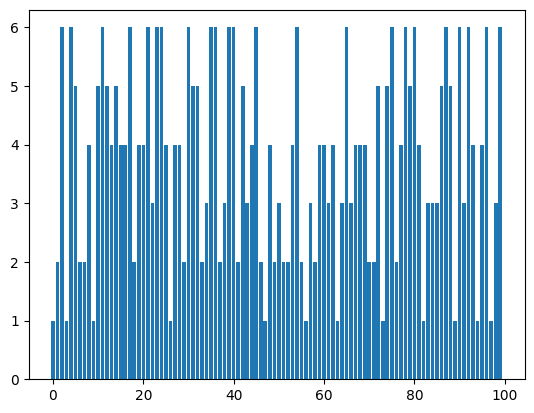

In [99]:
plt.bar(hd_rolls["roll"],hd_rolls["value"])

In [100]:
"""
The rolls aren't following any logic, there values are very random. There are two many values for the chart to be readable.
"""

"\nThe rolls aren't following any logic, there values are very random. There are two many values for the chart to be readable. \n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [101]:
result_mean = calculate_mean(hd_rolls["value"])
display(result_mean)

3.74

#### 3.- Now, calculate the frequency distribution.


In [102]:
result_fd = calculate_fd(hd_rolls["value"])
display(result_fd)

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram?

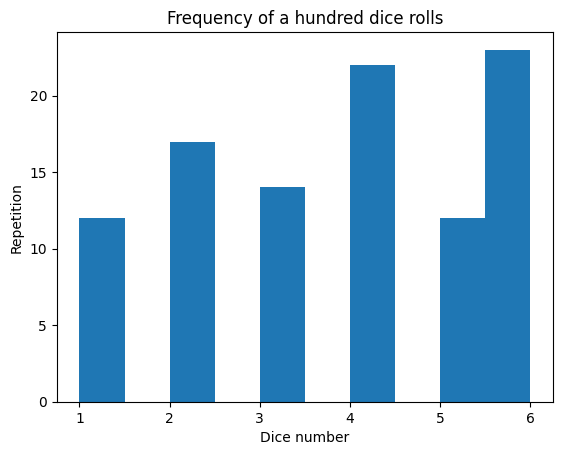

In [103]:
plt.hist(hd_rolls["value"])
plt.ylabel("Repetition")
plt.xlabel("Dice number")
plt.title('Frequency of a hundred dice rolls')
plt.show()

In [104]:
"""
Values are between 0 and 25 more or less.
A little tendency where the highest the number the more often it appears but nothing very clear.
The standard deviation is quite large.
"""

'\nValues are between 0 and 25 more or less. \nA little tendency where the highest the number the more often it appears but nothing very clear. \n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [125]:
thsd_rolls = pd.read_csv("roll_the_dice_thousand.csv")
thsd_rolls

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


In [126]:
result_fd = calculate_fd(thsd_rolls["value"])
display(result_fd)

{5: 149, 6: 166, 1: 175, 2: 167, 4: 168, 3: 175}

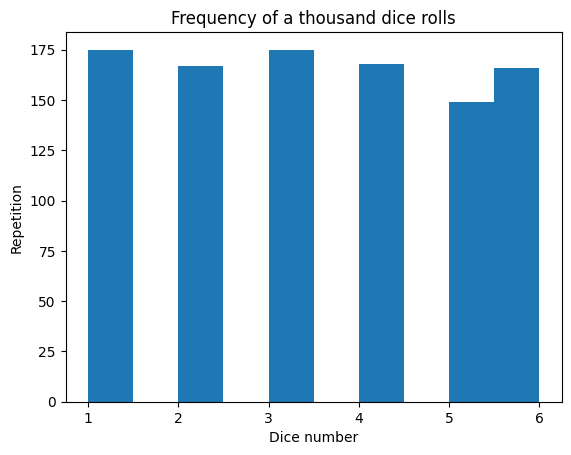

In [130]:
plt.hist(thsd_rolls["value"])
plt.ylabel("Repetition")
plt.xlabel("Dice number")
plt.title('Frequency of a thousand dice rolls')
plt.show()

In [106]:
"""
The frequency are a lot more similar than in the previous example.
The amount of repetition kind of equalize it.
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot.

In [133]:
age_pop = pd.read_csv("ages_population.csv")
age_pop

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


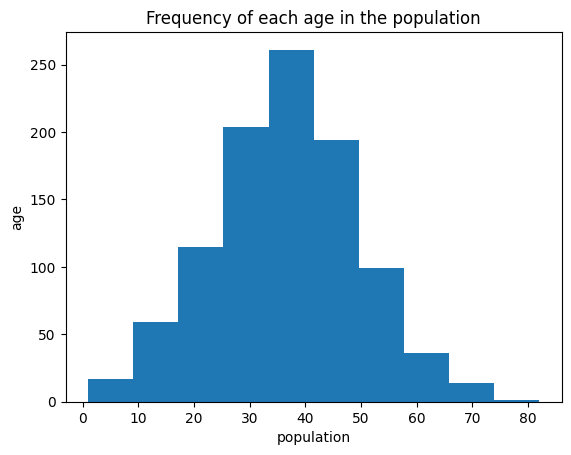

In [137]:
result_fd = calculate_fd(age_pop["observation"])

plt.hist(age_pop["observation"])
plt.ylabel("age")
plt.xlabel("population")
plt.title('Frequency of each age in the population')
plt.show()

In [ ]:
"""
By looking at the plot, I think that the mean will be between 30 and 40 years old.
I'm also guessing that the standard deviation will be around 10 years.
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [139]:
print(age_pop.mean())
print(np.std(age_pop))

observation    36.56
dtype: float64
observation    12.81009
dtype: float64


In [109]:
"""
Indeed, the mean is 36.56 and the standard deviation is 12.81.
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

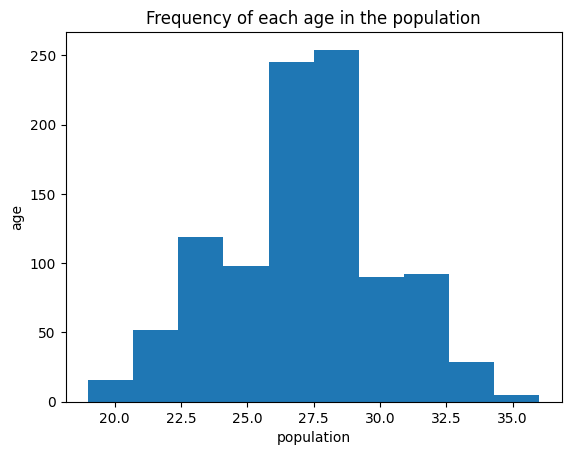

In [140]:
age_pop2 = pd.read_csv("ages_population2.csv")
result_fd = calculate_fd(age_pop2["observation"])

plt.hist(age_pop2["observation"])
plt.ylabel("age")
plt.xlabel("population")
plt.title('Frequency of each age in the population')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [141]:
"""
The population in this survey were a lot younger as all values are between 20 and 35 years old.
The mean seems to be around 27.5 years old. The standard deviation will also be a lower than in the previous example as values are closer to each other.
"""

'\nThe population in this survey were a lot younger as all values are between 20 and 35 years old. \nThe mean seems to be around 27.5 years old. The standard deviation will also be a lower than in the previous example as values are closer to each other. \n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [142]:
print(age_pop2.mean())
print(np.std(age_pop2))

observation    27.155
dtype: float64
observation    2.968329
dtype: float64


In [113]:
"""
As expected, the mean is a bit more than 27 years old.
The standard deviation is now 2.97.
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

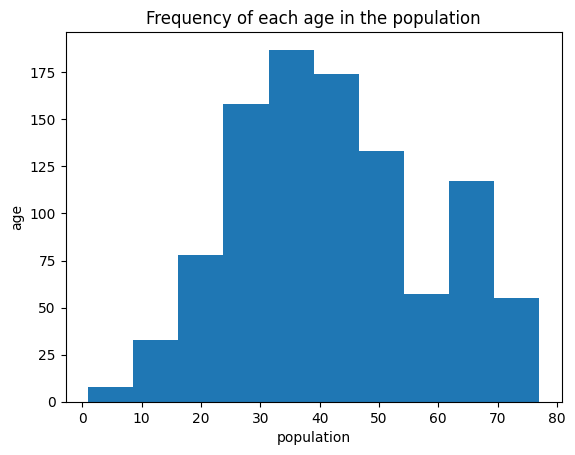

In [143]:
age_pop3 = pd.read_csv("ages_population3.csv")
result_fd = calculate_fd(age_pop3["observation"])

plt.hist(age_pop3["observation"])
plt.ylabel("age")
plt.xlabel("population")
plt.title('Frequency of each age in the population')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [144]:
print(age_pop3.mean())
print(np.std(age_pop3))

observation    41.989
dtype: float64
observation    16.136632
dtype: float64


In [145]:
"""
As in the step1, we have a very diverse population with people between 0 and 80 years old.
We can see that the mean is a bit higher than in the step 1 as more people are aged between 40 and 55 years old.

The standard deviations is also higher because the grap isn't as symetric and values are higher on the right side of the mean. There is also a pic between 65 and 70 years old increasing the gap.

"""

"\nAs in the step1, we have a very diverse population with people between 0 and 80 years old. \nWe can see that the mean is a bit higher than in the step 1 as more people are aged between 40 and 55 years old. \n\nThe standard deviations is also higher because the grap isn't as symetric and values are higher on the right side of the mean. There is also a pic between 65 and 70 years old increasing the gap. \n\n"

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [150]:
q1 = np.percentile(age_pop3, 25)
q2 = np.percentile(age_pop3, 50)
q3 = np.percentile(age_pop3, 75)

print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)

Q1: 30.0
Q2 (Median): 40.0
Q3: 53.0


In [118]:
"""
The median and the mean are very similar.
q1 is also closer to the median than q3 because more people are older than the mean.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [152]:
p1 = np.percentile(age_pop3, 20)
p2 = np.percentile(age_pop3, 40)
p3 = np.percentile(age_pop3, 60)
p4 = np.percentile(age_pop3, 80)

print("P1:", p1)
print("P2:", p2)
print("P3:", p3)
print("P4:", p4)


P1: 28.0
P2: 36.0
P3: 45.0
P4: 57.0


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [121]:
# your code here

In [122]:
"""
your comments here
"""

'\nyour comments here\n'